# Graph Statistics

In this notebook, I will show how to obtain basic graph statistics (number of nodes, density, etc.) from the graphs stored in our filespec.

## Load the Graphs

In [13]:
from c_elegans.witvilet2020 import witvilet2020 as wit
from c_elegans.worm_wiring import worm_wiring as worm
import networkx as nx
from networkx.algorithms.components import number_strongly_connected_components as ncc_strong
from networkx.algorithms.components import number_weakly_connected_components as ncc_weak
import matplotlib.pyplot as plt
import numpy as np

worm_graphs = worm.load_worm()
wit_graphs = wit.load_wit()
worm_connectomes = worm_graphs[-6:]

AttributeError: module 'c_elegans.worm_wiring.worm_wiring' has no attribute 'load_worm'

## Obtain Graph Statistics and Metadata

In [2]:
lcc_size = [] #Instead of number of nodes -- number of nodes in largest weakly connected component
density = []
num_strong = []
num_weak = []
synapse_type = []
sex = []
in_degree = []
out_degree = []
for g in worm_connectomes+wit_graphs:
    lcc_size.append(len(max(nx.weakly_connected_components(g))))
    density.append(nx.density(g))
    num_strong.append(ncc_strong(g))
    num_weak.append(ncc_weak(g))
    try:
        synapse_type.append(g.graph['Synapse Type'])
    except KeyError:
        synapse_type.append("Unknown")
    try:
        sex.append(g.graph['Sex'])
    except KeyError:
        sex.append("Unknown")
    in_degree.append([d for _, d in g.in_degree()])
    out_degree.append([d for _, d in g.out_degree()])

sex = np.array(sex)
lcc_size = np.array(lcc_size)
density = np.array(density)
num_strong = np.array(num_strong)
num_weak = np.array(num_weak)
in_degree = [np.array(ins) for ins in in_degree]
out_degree = [np.array(outs) for outs in out_degree]

## Visualize 

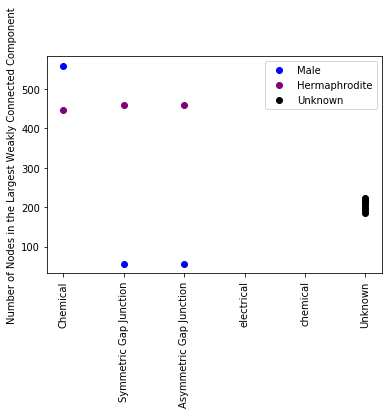

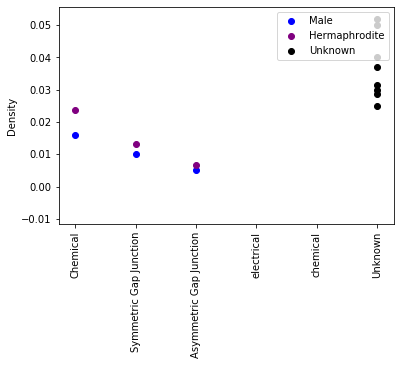

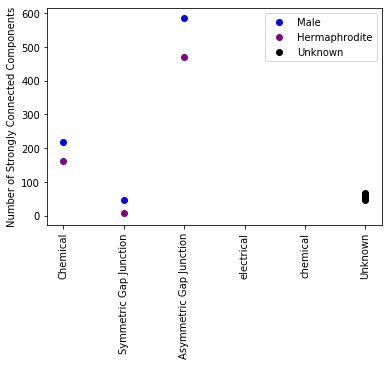

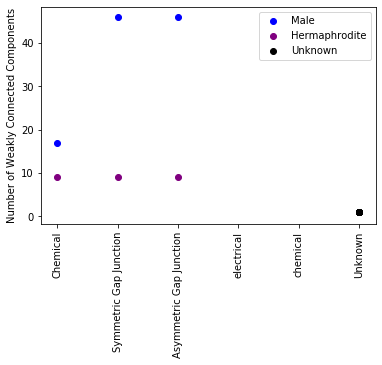

In [4]:
syntypes = ["Chemical", "Symmetric Gap Junction", "Asymmetric Gap Junction", "electrical", "chemical", "Unknown"]
syntype2pos = {syntype:i for i, syntype in enumerate(syntypes)}
syn_pos = np.array([syntype2pos[syntype] for syntype in synapse_type])
sexes = ["Male", "Hermaphrodite", "Unknown"]
sex2color = {"Male":'b', "Hermaphrodite":'purple', "Unknown":'k'}
sex_colors = [sex2color[isex] for isex in sex]

def vis_stat(stat, stat_name):
    fig = plt.figure()
    ax = plt.gca()
    plt.hold=True
    for isex in sexes:
        plt.scatter(syn_pos[sex==isex], stat[sex==isex], c=sex2color[isex], label=isex)
    plt.hold=False
    plt.ylabel(stat_name)
    ax.xaxis.set_ticks(range(len(syntypes)))
    ax.xaxis.set_ticklabels(syntypes, rotation=90)
    plt.legend(loc='upper right')
    return fig
    
fig = vis_stat(lcc_size, "Number of Nodes in the Largest Weakly Connected Component")
fig.savefig("num_nodes.png", bbox_inches="tight")
fig = vis_stat(density, "Density")
fig.savefig("density.png", bbox_inches="tight")
fig = vis_stat(num_strong, "Number of Strongly Connected Components")
fig.savefig("num_strong.png", bbox_inches="tight")
fig = vis_stat(num_weak, "Number of Weakly Connected Components")
fig.savefig("num_weak.png", bbox_inches="tight")